# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

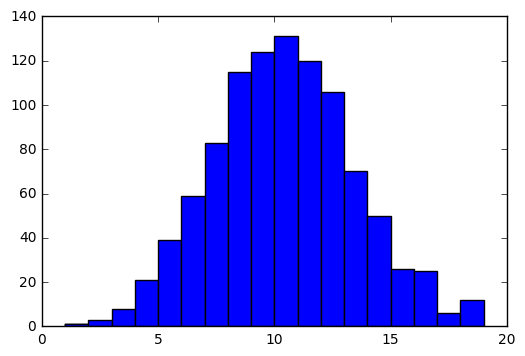

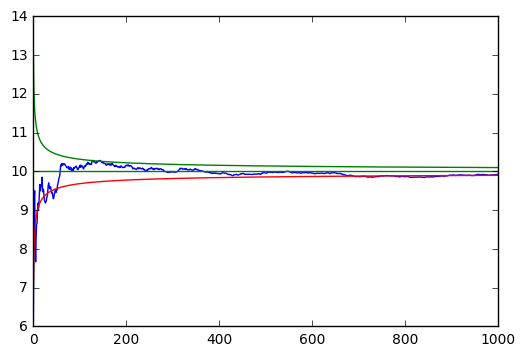

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sample = np.random.poisson(lam=10, size=1000)

means = np.cumsum(sample) / np.arange(1, 1001)

plt.hist(sample, bins = range(1, 20))
plt.show()
plt.plot(means)
plt.axhline(y = 10, color='g')
diff = (10 / np.arange(1, 1001)) ** 0.5
plt.plot(10 + diff)
plt.plot(10 - diff)
plt.show()

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. 
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$. 
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges? 
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and 
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

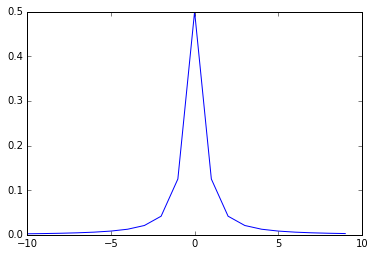

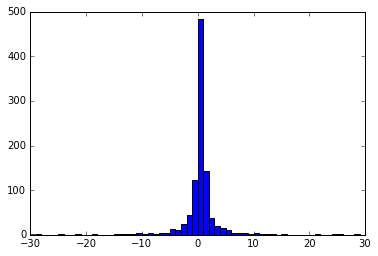

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

def distr(k):
    if k == 0:
        return 0.5
    else:
        return 1 / (4 * abs(k) * (abs(k) + 1))


sample = [distr(k) for k in range(-10, 10)]

    
plt.plot(range(-10, 10), sample)
plt.show()


def randDistr(i):
    y = random.random()
    if y < 0.5:
        return 0
    else:
        sgn = -1 if random.random() < 0.5 else 1
        x = random.random()
        wyn = np.ceil(1 / (x)) - 1
        return sgn * wyn

    
vecDistr = np.vectorize(randDistr)

vecsam = np.fromfunction(vecDistr, (1000, ), dtype=int)

plt.hist(vecsam, bins=range(-30, 30))
plt.show()
 

**Problem 3c.** We are now going to investigate an intermediate case - a variable with a finite mean, but no variance. Consider a discrete variable $Y$ with the following distribution: $P(Y=k) = \frac{1}{|k|(|k|+1)(|k|+2)}$ for $k \neq 0$ and $P(Y=0) = \frac{1}{2}$. 
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $EY=0$, but $Y$ has no variation (i.e. the defining series is not absolutely convergent).
 * Plot the function $f(k) = P(Y=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $Y$'s distribution.
 * Generate $N=10\,000$ values $y_1,\ldots,y_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{y}_i = \frac{y_1+\ldots+y_i}{i}$. 
 * Plot the values of $\bar{y}_i$. Does it look like the series converges?
 * For $i \in \{1,\ldots,n\}$ compute $\hat{y}_i = \textrm{ median of }\{y_1,\ldots,y_i\}$.
 * Plot the values of $\hat{y}_i$.
 * Discuss the results obtained.

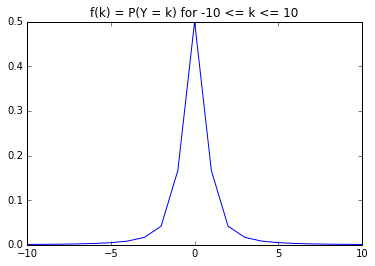

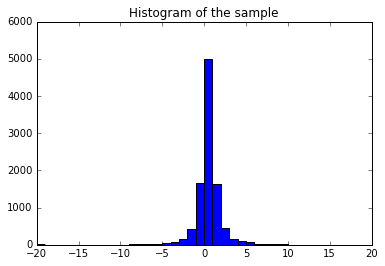

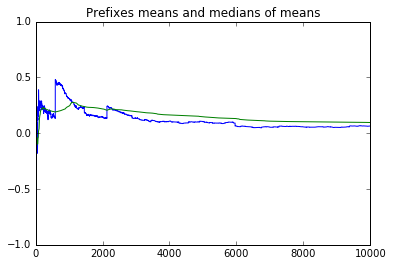

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline

""" Graph of the function. """
def distr(k):
    if k == 0:
        return 0.5
    else:
        K = abs(k)
        return 1 / (K * (K + 1) * (K + 2))
    
distribution = [distr(k) for k in range(-10, 11)]

plt.plot(range(-10, 11), distribution)
plt.title('f(k) = P(Y = k) for -10 <= k <= 10')
plt.show()

""" Sampling with the given distribution. """

# determine the result from the random number
def getBucket(x):
    A = 1 / x
    # res - highest value which is natural and fulfills A >= 2 * res * (res + 1) 
    res = np.ceil(((-1 + math.sqrt(1 + 2 * A)) / 2)) - 1
    return res
    
    
def randDistr(i):
    y = random.random()
    if y < 0.5:
        return 0
    else:
        # randomize sign of the number (symmetric actions)
        sgn = -1 if random.random() < 0.5 else 1
        x = np.random.uniform(0, 0.25)
        wyn = getBucket(x)
        return int(sgn * wyn)


def sample(N):  
    vecDistr = np.vectorize(randDistr)
    vecsam = np.fromfunction(vecDistr, (N, ), dtype=int)
    return vecsam

N = 10000
vecsam = sample(N)

plt.hist(vecsam, bins=range(-20, 20))
plt.title('Histogram of the sample')
plt.show()

means = np.cumsum(vecsam) / np.arange(1, N + 1)

# calculate medians of means
def med(i):
    return np.median(means[:i + 1])

medians = np.empty(N)
for i in np.arange(N):
    medians[i] = med(i)


plt.plot(means)
plt.plot(medians)
plt.title('Prefixes means and medians of means')
plt.show()